Epoch 1/100


c:\Users\chugg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10894/10894 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7083 - loss: 0.6919 - val_accuracy: 0.7759 - val_loss: 0.5170
Epoch 2/100
10894/10894 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7710 - loss: 0.5334 - val_accuracy: 0.8045 - val_loss: 0.4618
Epoch 3/100
10894/10894 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7887 - loss: 0.4975 - val_accuracy: 0.8105 - val_loss: 0.4429
Epoch 4/100
10894/10894 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7975 - loss: 0.4793 - val_accuracy: 0.8236 - val_loss: 0.4175
Epoch 5/100
10894/10894 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8033 - loss: 0.4644 - val_accuracy: 0.8321 - val_loss: 0.4034
Epoch 6/100
10894/10894 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8085 - loss: 0.4536 - val_accuracy: 0.8343 - val_loss: 0.3903
Epoch 7/100
10894/10894 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.8117 - loss: 0.4476 - val_accuracy: 0.8389 - val_loss: 0.3845
Epoch 8/100
10894/10894 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.81

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 2s 595us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     42218
           1       0.89      0.92      0.90     56895
           2       0.84      0.88      0.86      7075
           3       0.81      0.65      0.72       536
           4       0.78      0.52      0.63      1933
           5       0.71      0.73      0.72      3449
           6       0.93      0.82      0.87      4097

    accuracy                           0.88    116203
   macro avg       0.84      0.77      0.80    116203
weighted avg       0.88      0.88      0.88    116203

Confusion Matrix:
 [[36450  5490     3     0    50     9   216]
 [ 3396 52542   307     0   226   385    39]
 [    4   216  6247    64     6   538     0]
 [    0     0   138   347     0    51     0]
 [   38   811    54     0  1011    19     0]
 [   13   195   713    15     3  2510     0]
 [  674    55     0     0     2     0  3366]]

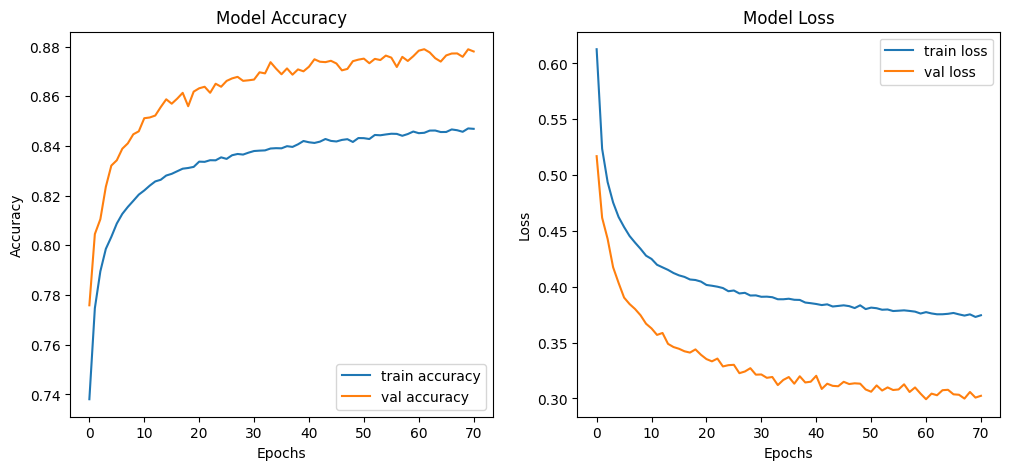

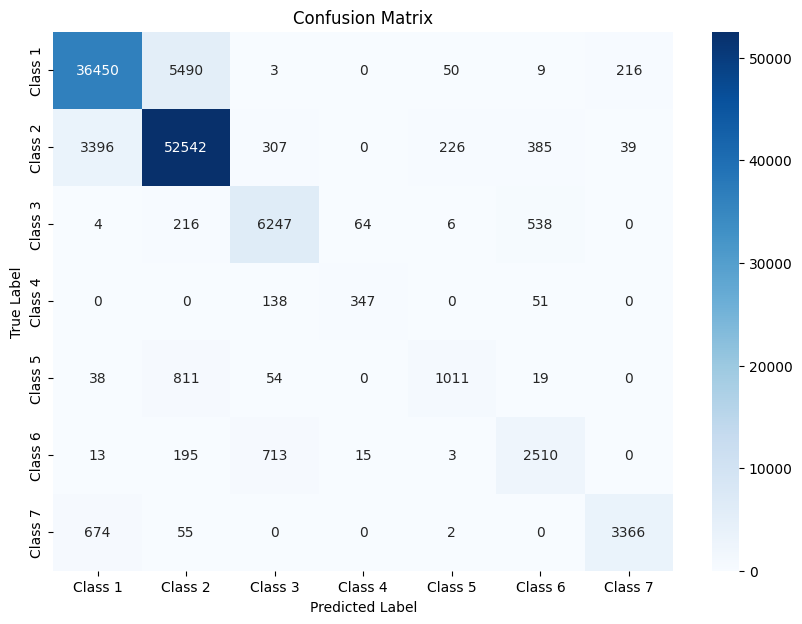

In [ ]:
# Forest Cover Type Classification: Model Evaluation and Analysis by Danyal Sultan

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, Dropout
from keras._tf_keras.keras.optimizers import Adam
from keras._tf_keras.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv("cover_data.csv")

# Define feature columns and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1] - 1  # Shift labels to start from 0


# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Dropout regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 output classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

# Save the model
model.save('covtype_classification_model.h5')

# Load the model (just to demonstrate loading)
loaded_model = tf.keras.models.load_model('covtype_classification_model.h5')

# Evaluate the model on the test set
y_pred = np.argmax(loaded_model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the training & validation accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(1, 8)], 
            yticklabels=[f'Class {i}' for i in range(1, 8)])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()